In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
# Reading data
db = pd.read_csv('..\_data\Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv')

# Convert to datetime
db['Date_Time'] = pd.to_datetime(db['Date_Time'], format='%m/%d/%Y %H:%M:%S %p')
db.set_index('Date_Time', inplace=True)

db.head()

,ID,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts
Date_Time,,,,,,,,,
2019-11-01 05:00:00,2887628,2019,November,1,Friday,17,34,Flinders St-Spark La,300
2019-11-01 05:00:00,2887629,2019,November,1,Friday,17,39,Alfred Place,604
2019-11-01 05:00:00,2887630,2019,November,1,Friday,17,37,Lygon St (East),216
2019-11-01 05:00:00,2887631,2019,November,1,Friday,17,40,Lonsdale St-Spring St (West),627
2019-11-01 05:00:00,2887632,2019,November,1,Friday,17,36,Queen St (West),774


In [4]:
# pivot table
table = pd.pivot_table(db, values='Hourly_Counts', index='Time', columns='Mdate', aggfunc=np.mean, fill_value=0, dropna=True)
table.shape

(24, 31)

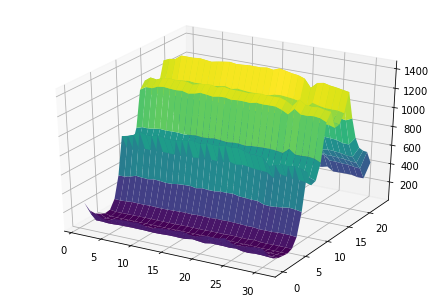

In [8]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D 

y = table.index.values
x = table.columns.values
X,Y = np.meshgrid(x,y)
Z = table.values

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X,Y,Z, cmap=cm.viridis,)

plt.show()

In [7]:
print('x: ', x.shape)
print('y: ', y.shape)
print('X: ', X.shape)
print('Y: ', Y.shape)
print('Z: ', Z.T.shape)

x:  (24,)
y:  (31,)
X:  (31, 24)
Y:  (31, 24)
Z:  (31, 24)


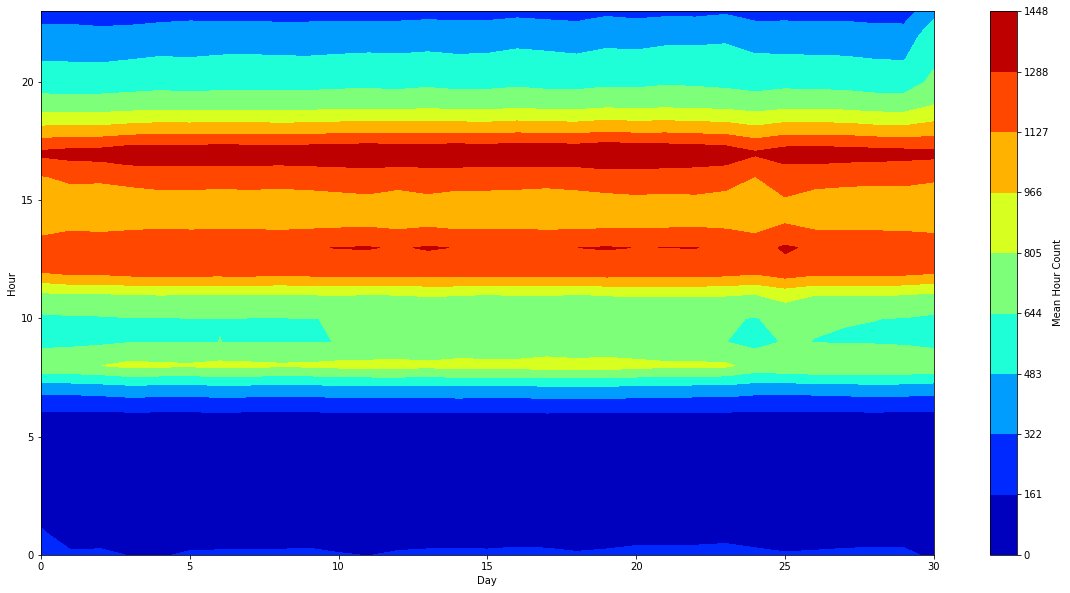

In [30]:
level=np.linspace(0, table.max().max(), 10)

plt.figure(figsize=(20,10))
f = plt.contourf(table, levels=level, cmap=plt.cm.viridis)
plt.xlabel('Day')
plt.ylabel('Hour')
cbar = plt.colorbar(f)
cbar.ax.set_ylabel('Mean Hour Count')
plt.show()

In [17]:
table.min().min()

28.384003854492892

In [19]:
np.linspace(0, table.max().max(), 10)

array([   0.        ,  160.94249653,  321.88499306,  482.82748959,
        643.76998612,  804.71248266,  965.65497919, 1126.59747572,
       1287.53997225, 1448.48246878])